In [85]:
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr, spearmanr, chisquare
from scipy import stats
from scipy.spatial.distance import canberra, cosine, euclidean, minkowski, cityblock, hamming, jaccard, dice, braycurtis
from sklearn.metrics.pairwise import paired_distances
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.special import rel_entr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets import make_blobs

In [86]:
# Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Manhattan distance
def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

# Cosine similarity
def cosine_similarity(p1, p2):
    return 1 - distance.cosine(p1, p2)

point1 = np.array([1, 2])
point2 = np.array([3, 4])

print("Euclidean distance:", euclidean_distance(point1, point2))
print("Manhattan distance:", manhattan_distance(point1, point2))
print("Cosine similarity:", cosine_similarity(point1, point2))

Euclidean distance: 2.8284271247461903
Manhattan distance: 4
Cosine similarity: 0.9838699100999074


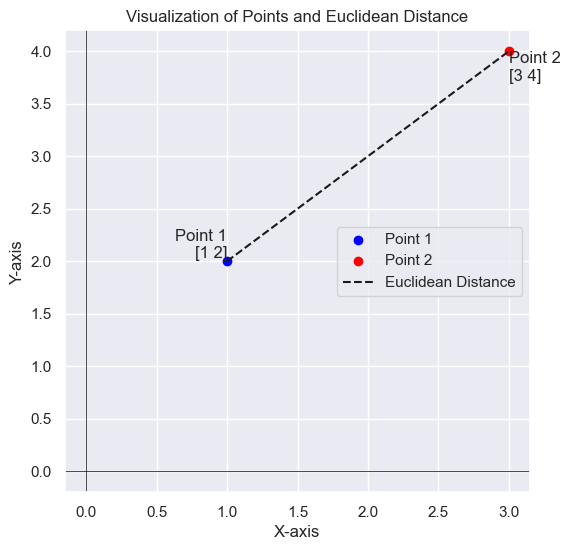

In [ ]:
# Plot graph points
plt.figure(figsize=(6, 6))
plt.scatter(point1[0], point1[1], color='blue', label='Point 1')
plt.scatter(point2[0], point2[1], color='red', label='Point 2')
# Conect the dots to illustrate the eclidean distance
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--', label='Euclidean Distance')
# Add notes and details
plt.text(point1[0], point1[1], f'Point 1\n{point1}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(point2[0], point2[1], f'Point 2\n{point2}', fontsize=12, verticalalignment='top', horizontalalignment='left')
# Graph configuration
plt.title('Visualization of Points and Euclidean Distance')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
# Mostrar o gráfico
plt.show()

<h1> K-Means
<h3> The cluster center is the arithmetic mean of all the points belnging to the cluster
<h3> Each point is closer to it's own cluster center than to the other cluster centers.

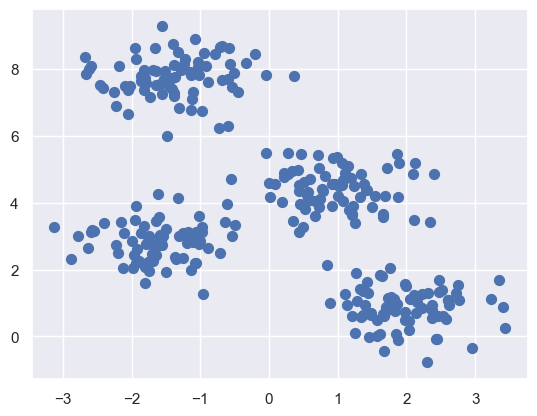

In [88]:
X, y_true = make_blobs(n_samples=300, centers=4,
                              cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

<h1> k-Means Algorithm: Expectation–Maximization

<h3> Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach consists of the following procedure:

<h3> Guess some cluster centers

<h3> Repeat until converged

<h3> E-Step: assign points to the nearest cluster center

<h3> M-Step: set the cluster centers to the mean

![image](../images/cluster.png)

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0], d

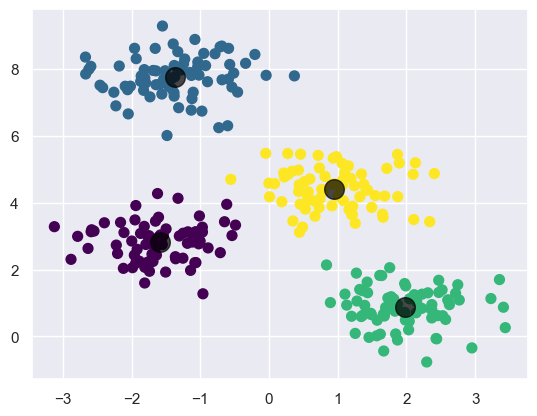

In [90]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

<h3> Using k-means to group wine by class.

In [91]:
from sklearn import datasets

# Load wine dataset
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<h3> Normalize data values

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaler.fit(wine.data)
wine.data = scaler.transform(wine.data)

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(wine.data)
y_kmeans = kmeans.predict(wine.data)
y_kmeans


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [93]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [94]:
# y_m= np.zeros(y_kmeans.size,dtype=int)

# for i in range(y_kmeans.size):
#  if y_kmeans[i] ==2:
#    y_m[i] =1
#  elif y_kmeans[i] ==1:
#    y_m[i] = 0
#  else:
#    y_m[i] =2
# y_m

In [95]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_kmeans, wine.target))

Accuracy: 0.016853932584269662


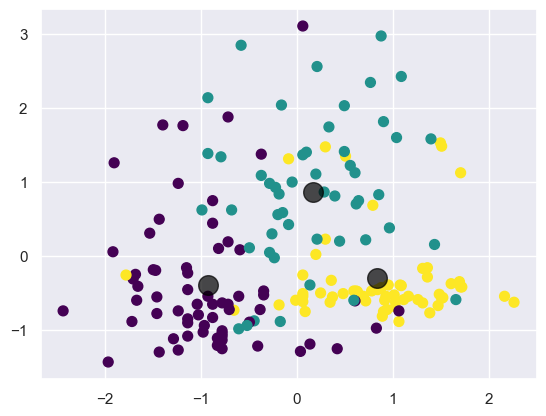

In [96]:
plt.scatter(wine.data[:, 0], wine.data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)